In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [35]:
df = pd.read_csv("C:/Users/SANJAY/Desktop/ExcelR/Assignments/Assignment - 14/Decision trees/Fraud_check.csv")
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [36]:
df.shape

(600, 6)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [38]:
df.isnull().any()

Undergrad          False
Marital.Status     False
Taxable.Income     False
City.Population    False
Work.Experience    False
Urban              False
dtype: bool

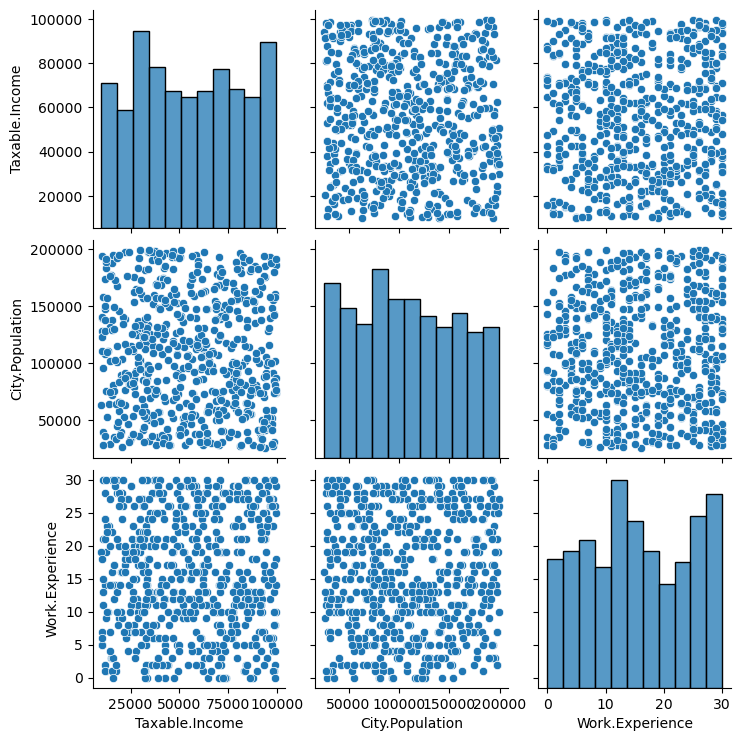

In [39]:
sns.pairplot(df)

<AxesSubplot:>

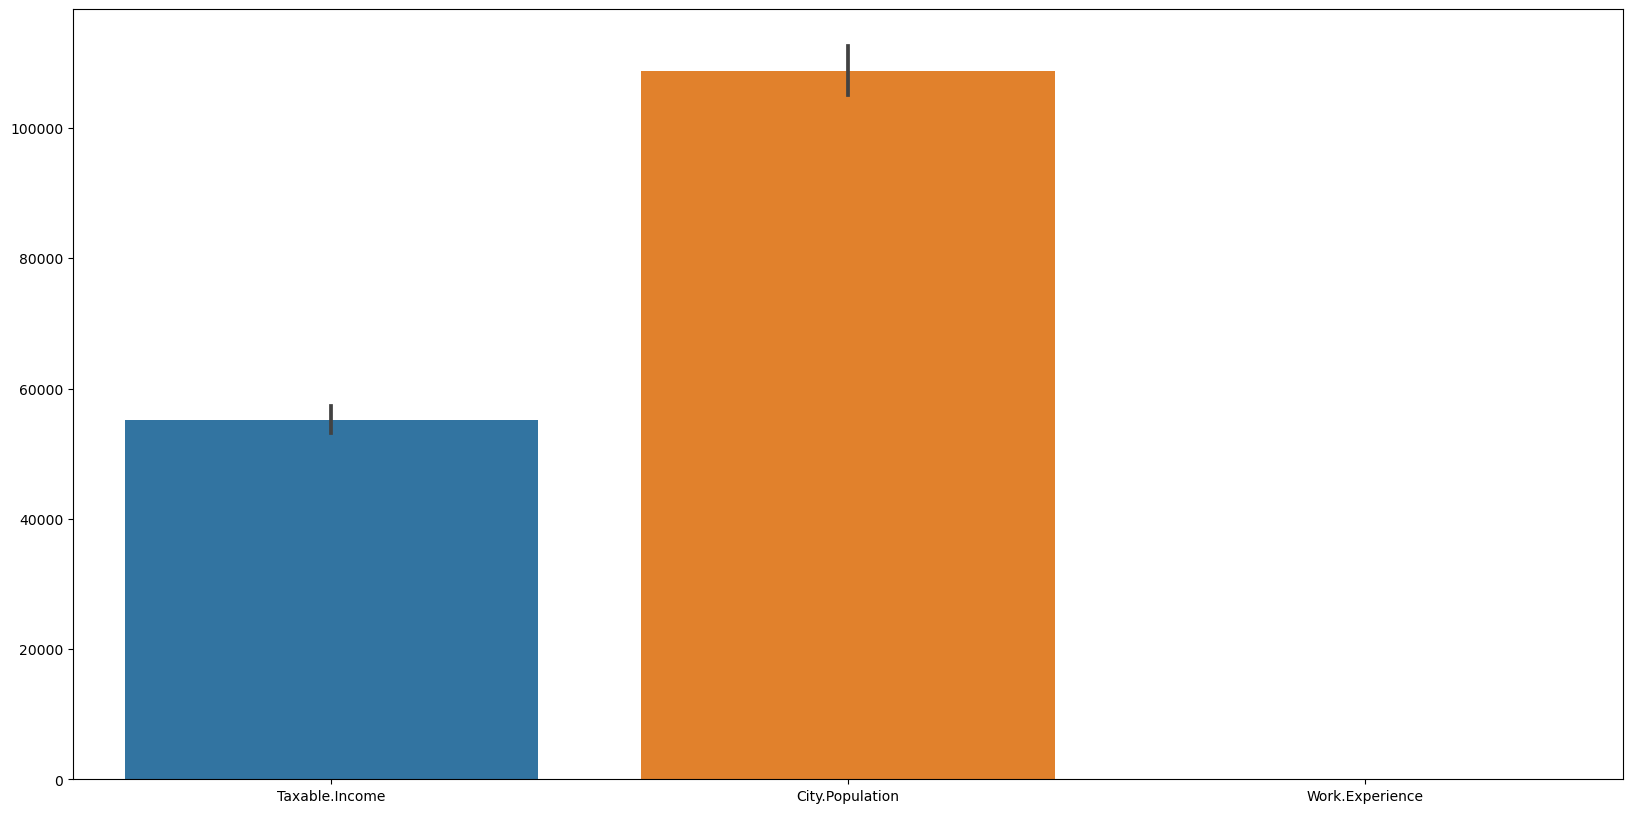

In [40]:
plt.figure(figsize=(20,10))
sns.barplot(data=df)

In [41]:
# Converting categorical to numerical
cols = ['Undergrad','Marital.Status','Urban']
#label encoding
df[cols]=df[cols].apply(LabelEncoder().fit_transform)
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0


In [42]:
df.describe()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,0.520000,1.046667,55208.375000,108747.368333,15.558333,0.503333
std,0.500017,0.821958,26204.827597,49850.075134,8.842147,0.500406
min,0.000000,0.000000,10003.000000,25779.000000,0.000000,0.000000
25%,0.000000,0.000000,32871.500000,66966.750000,8.000000,0.000000
50%,1.000000,1.000000,55074.500000,106493.500000,15.000000,1.000000
75%,1.000000,2.000000,78611.750000,150114.250000,24.000000,1.000000
max,1.000000,2.000000,99619.000000,199778.000000,30.000000,1.000000


In [43]:
# treating those who have taxable_income <= 30000 as "Risky" and others are "Good"
tax_inc =[]
for value in df['Taxable.Income']:
    if value <= 30000:
            tax_inc.append('Risky')
    else:
        tax_inc.append('Good')
df['Taxable.Income'] = tax_inc
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,Good,50047,10,1
1,1,0,Good,134075,18,1
2,0,1,Good,160205,30,1
3,1,2,Good,193264,15,1
4,0,1,Good,27533,28,0


In [44]:
# Assiging dependent and independent variable
X = df.drop(['Taxable.Income'],axis=1)
X

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [45]:
Y = df['Taxable.Income']
Y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Taxable.Income, Length: 600, dtype: object

In [46]:
Y.unique

<bound method Series.unique of 0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Taxable.Income, Length: 600, dtype: object>

In [47]:
Y.value_counts()

Good     476
Risky    124
Name: Taxable.Income, dtype: int64

# Splitting the data into train and test data sets

In [48]:
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.2,random_state=1)

# Building Decision Tree Classifier (CART) using Entropy Criteria

In [49]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(0.5416666666666666, 0.875, 'X[3] <= 24.5\nentropy = 0.742\nsamples = 480\nvalue = [379, 101]'),
 Text(0.3333333333333333, 0.625, 'X[3] <= 6.5\nentropy = 0.774\nsamples = 369\nvalue = [285, 84]'),
 Text(0.16666666666666666, 0.375, 'X[4] <= 0.5\nentropy = 0.607\nsamples = 94\nvalue = [80, 14]'),
 Text(0.08333333333333333, 0.125, 'entropy = 0.391\nsamples = 39\nvalue = [36, 3]'),
 Text(0.25, 0.125, 'entropy = 0.722\nsamples = 55\nvalue = [44, 11]'),
 Text(0.5, 0.375, 'X[2] <= 39943.0\nentropy = 0.818\nsamples = 275\nvalue = [205, 70]'),
 Text(0.4166666666666667, 0.125, 'entropy = 0.967\nsamples = 28\nvalue = [17, 11]'),
 Text(0.5833333333333334, 0.125, 'entropy = 0.793\nsamples = 247\nvalue = [188, 59]'),
 Text(0.75, 0.625, 'X[3] <= 25.5\nentropy = 0.618\nsamples = 111\nvalue = [94, 17]'),
 Text(0.6666666666666666, 0.375, 'entropy = 0.0\nsamples = 16\nvalue = [16, 0]'),
 Text(0.8333333333333334, 0.375, 'X[2] <= 34266.5\nentropy = 0.678\nsamples = 95\nvalue = [78, 17]'),
 Text(0.75, 

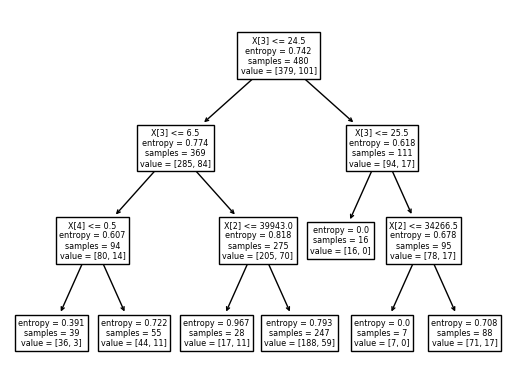

In [50]:
tree.plot_tree(model)

In [51]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,Good,50047,10,1
1,1,0,Good,134075,18,1
2,0,1,Good,160205,30,1
3,1,2,Good,193264,15,1
4,0,1,Good,27533,28,0


[Text(0.5416666666666666, 0.875, 'Work.Experience <= 24.5\nentropy = 0.742\nsamples = 480\nvalue = [379, 101]\nclass = Good'),
 Text(0.3333333333333333, 0.625, 'Work.Experience <= 6.5\nentropy = 0.774\nsamples = 369\nvalue = [285, 84]\nclass = Good'),
 Text(0.16666666666666666, 0.375, 'Urban <= 0.5\nentropy = 0.607\nsamples = 94\nvalue = [80, 14]\nclass = Good'),
 Text(0.08333333333333333, 0.125, 'entropy = 0.391\nsamples = 39\nvalue = [36, 3]\nclass = Good'),
 Text(0.25, 0.125, 'entropy = 0.722\nsamples = 55\nvalue = [44, 11]\nclass = Good'),
 Text(0.5, 0.375, 'City.Population <= 39943.0\nentropy = 0.818\nsamples = 275\nvalue = [205, 70]\nclass = Good'),
 Text(0.4166666666666667, 0.125, 'entropy = 0.967\nsamples = 28\nvalue = [17, 11]\nclass = Good'),
 Text(0.5833333333333334, 0.125, 'entropy = 0.793\nsamples = 247\nvalue = [188, 59]\nclass = Good'),
 Text(0.75, 0.625, 'Work.Experience <= 25.5\nentropy = 0.618\nsamples = 111\nvalue = [94, 17]\nclass = Good'),
 Text(0.6666666666666666,

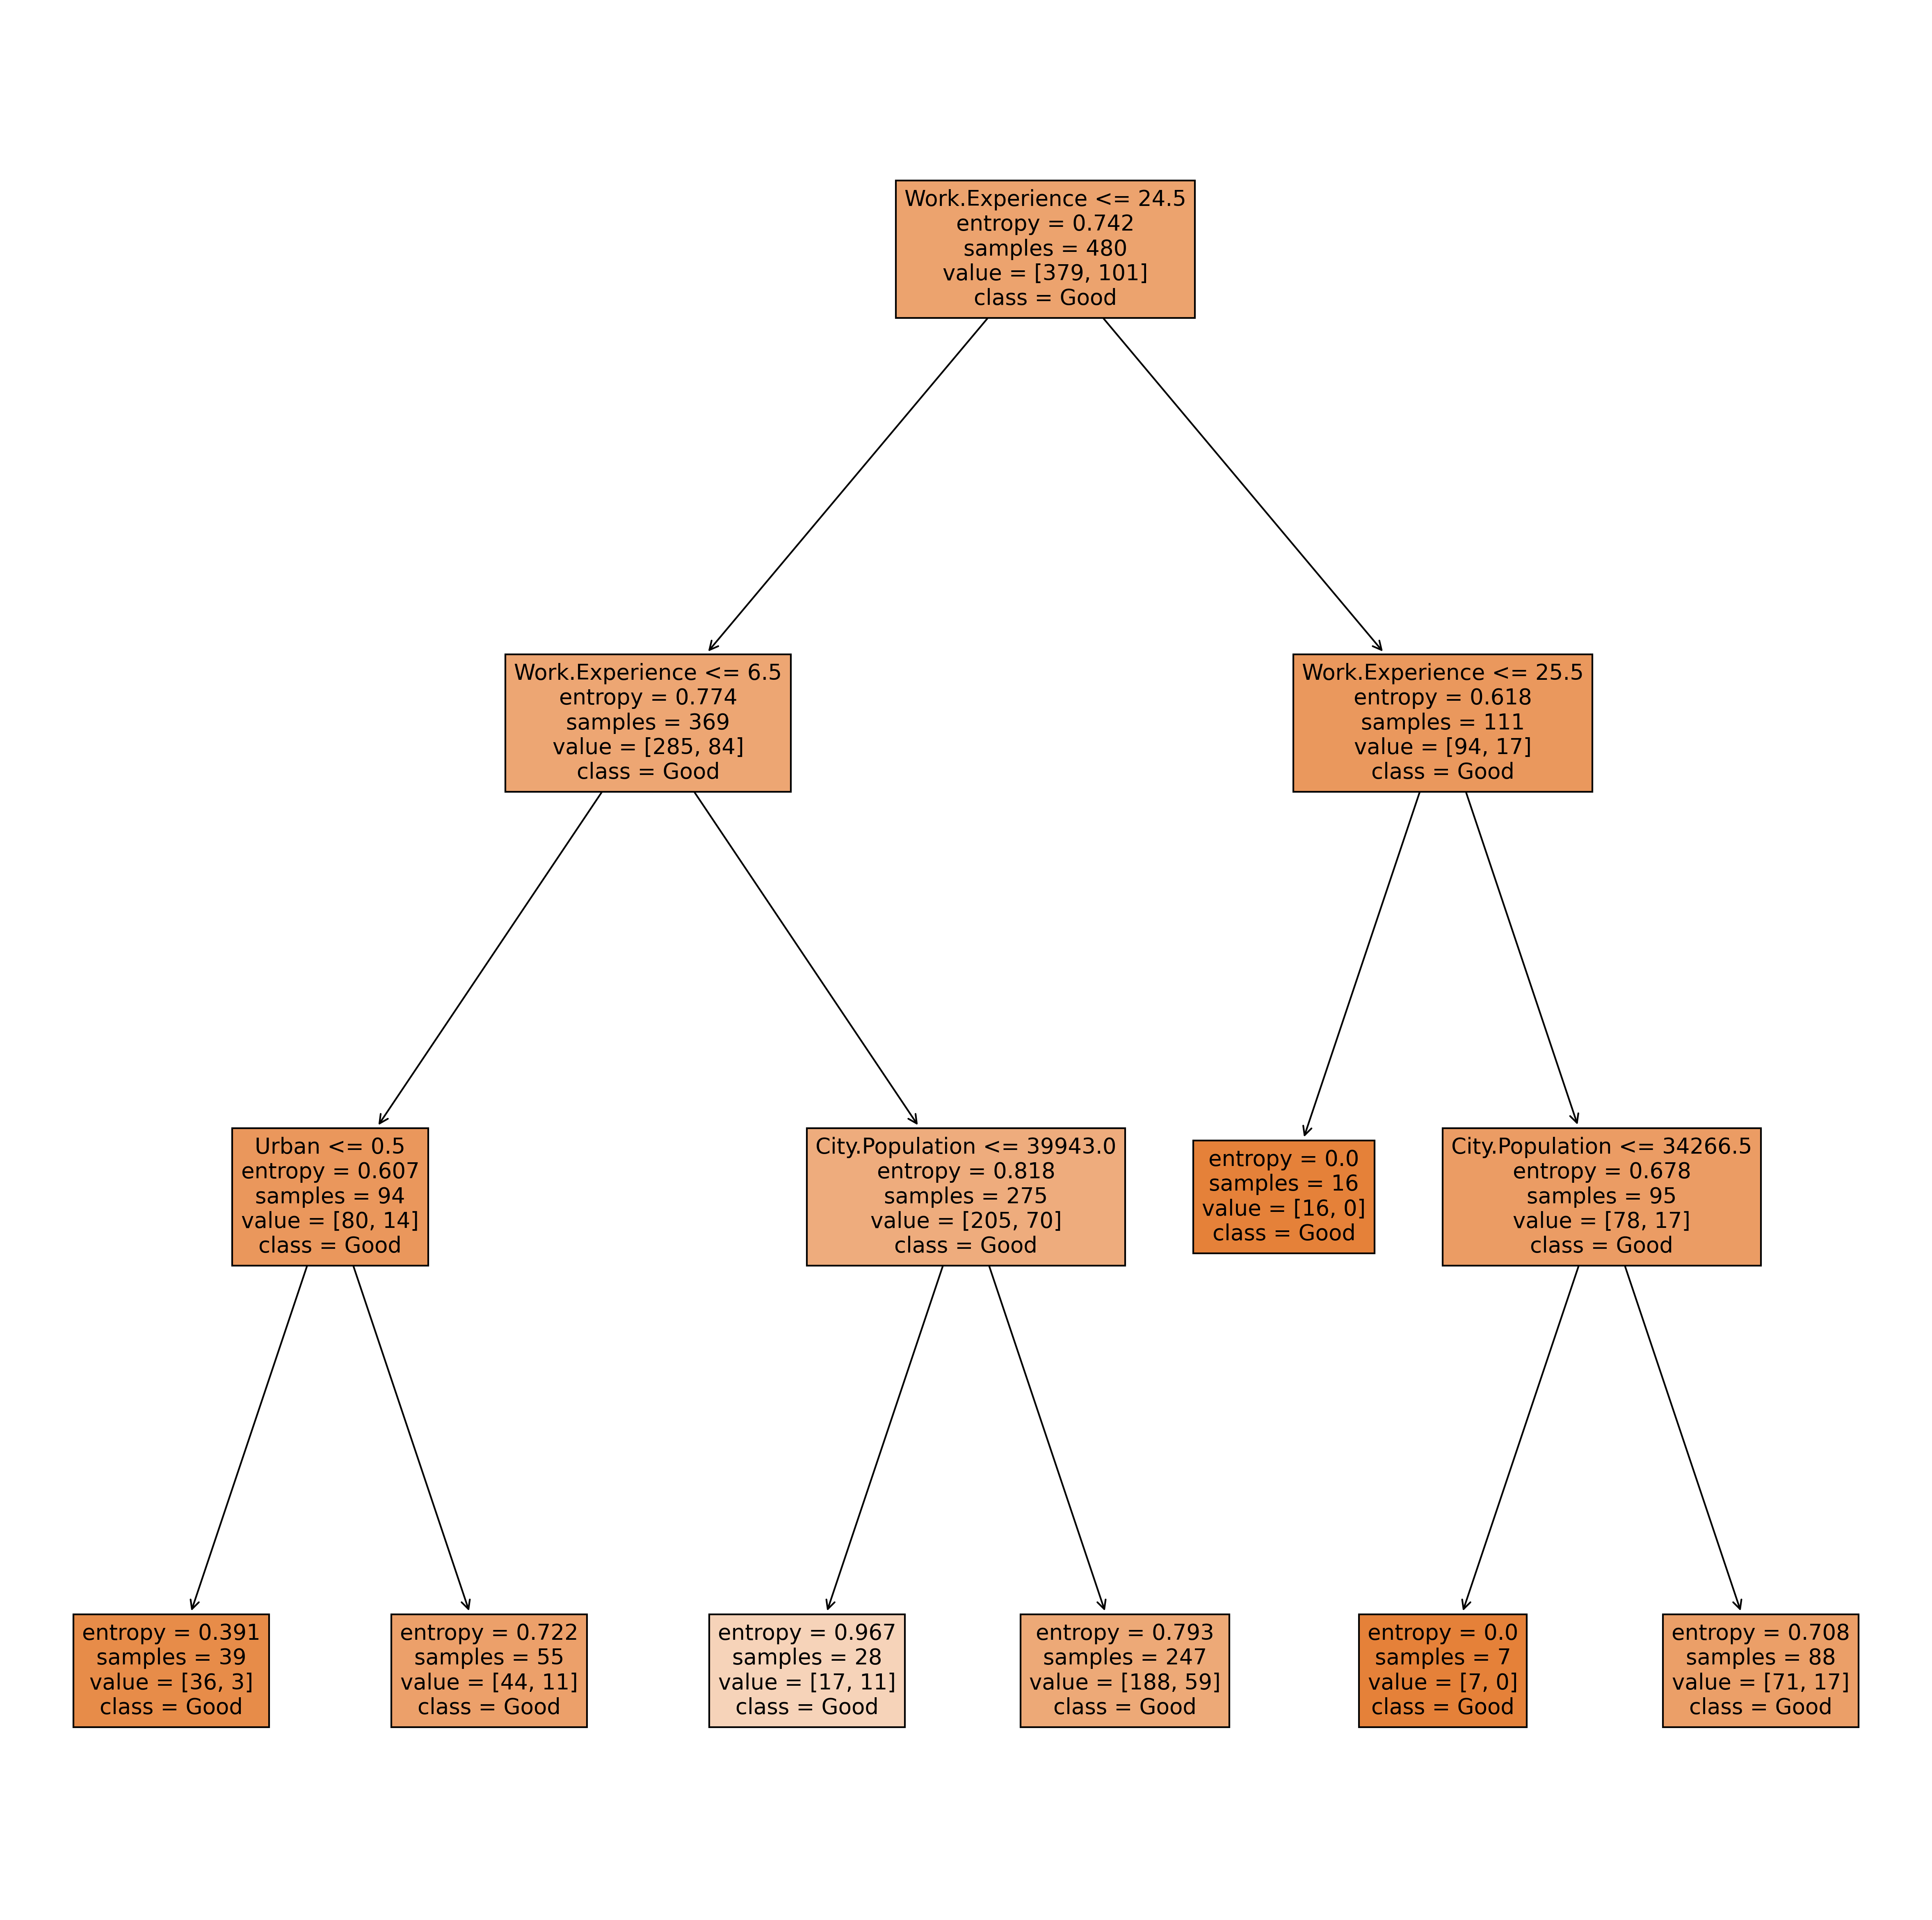

In [52]:
fn =['Undergrad','Marital.Status','City.Population','Work.Experience','Urban']
cn = ['Good','Risky']
fig,axes = plt.subplots(nrows=1, ncols=1, figsize=(20,20), dpi=300)
tree.plot_tree(model,feature_names=fn, class_names=cn, filled=True)

In [53]:
#Predicting the model
pred = model.predict(X_test)
pd.Series(pred).value_counts()

Good    120
dtype: int64

In [54]:
#Cross validation
pd.crosstab(Y_test,pred)

col_0,Good
Taxable.Income,
Good,97
Risky,23


In [55]:
# Accuracy
np.mean(pred==Y_test)*100

80.83333333333333

In [56]:
#Best Feature
model.feature_importances_

array([0.        , 0.        , 0.25955723, 0.60896022, 0.13148255])

# Building Decision Tree Classifier (CART) using Gini Criteria

In [57]:
#Predicting based on the trained gini based model
model_gini = DecisionTreeClassifier(criterion='gini',max_depth=3)
model_gini.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'X[3] <= 24.5\ngini = 0.332\nsamples = 480\nvalue = [379, 101]'),
 Text(0.25, 0.625, 'X[3] <= 6.5\ngini = 0.352\nsamples = 369\nvalue = [285, 84]'),
 Text(0.125, 0.375, 'X[2] <= 193594.0\ngini = 0.254\nsamples = 94\nvalue = [80, 14]'),
 Text(0.0625, 0.125, 'gini = 0.231\nsamples = 90\nvalue = [78, 12]'),
 Text(0.1875, 0.125, 'gini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.375, 0.375, 'X[2] <= 39943.0\ngini = 0.38\nsamples = 275\nvalue = [205, 70]'),
 Text(0.3125, 0.125, 'gini = 0.477\nsamples = 28\nvalue = [17, 11]'),
 Text(0.4375, 0.125, 'gini = 0.364\nsamples = 247\nvalue = [188, 59]'),
 Text(0.75, 0.625, 'X[3] <= 29.5\ngini = 0.259\nsamples = 111\nvalue = [94, 17]'),
 Text(0.625, 0.375, 'X[3] <= 25.5\ngini = 0.215\nsamples = 90\nvalue = [79, 11]'),
 Text(0.5625, 0.125, 'gini = 0.0\nsamples = 16\nvalue = [16, 0]'),
 Text(0.6875, 0.125, 'gini = 0.253\nsamples = 74\nvalue = [63, 11]'),
 Text(0.875, 0.375, 'X[2] <= 121060.5\ngini = 0.408\nsamples = 21\nvalue = [15,

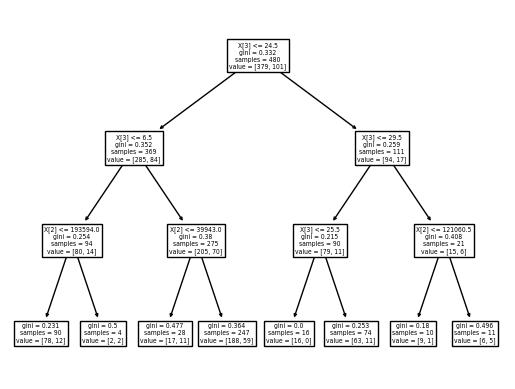

In [58]:
tree.plot_tree(model_gini)

[Text(0.5, 0.875, 'Work.Experience <= 24.5\ngini = 0.332\nsamples = 480\nvalue = [379, 101]\nclass = Good'),
 Text(0.25, 0.625, 'Work.Experience <= 6.5\ngini = 0.352\nsamples = 369\nvalue = [285, 84]\nclass = Good'),
 Text(0.125, 0.375, 'City.Population <= 193594.0\ngini = 0.254\nsamples = 94\nvalue = [80, 14]\nclass = Good'),
 Text(0.0625, 0.125, 'gini = 0.231\nsamples = 90\nvalue = [78, 12]\nclass = Good'),
 Text(0.1875, 0.125, 'gini = 0.5\nsamples = 4\nvalue = [2, 2]\nclass = Good'),
 Text(0.375, 0.375, 'City.Population <= 39943.0\ngini = 0.38\nsamples = 275\nvalue = [205, 70]\nclass = Good'),
 Text(0.3125, 0.125, 'gini = 0.477\nsamples = 28\nvalue = [17, 11]\nclass = Good'),
 Text(0.4375, 0.125, 'gini = 0.364\nsamples = 247\nvalue = [188, 59]\nclass = Good'),
 Text(0.75, 0.625, 'Work.Experience <= 29.5\ngini = 0.259\nsamples = 111\nvalue = [94, 17]\nclass = Good'),
 Text(0.625, 0.375, 'Work.Experience <= 25.5\ngini = 0.215\nsamples = 90\nvalue = [79, 11]\nclass = Good'),
 Text(0.56

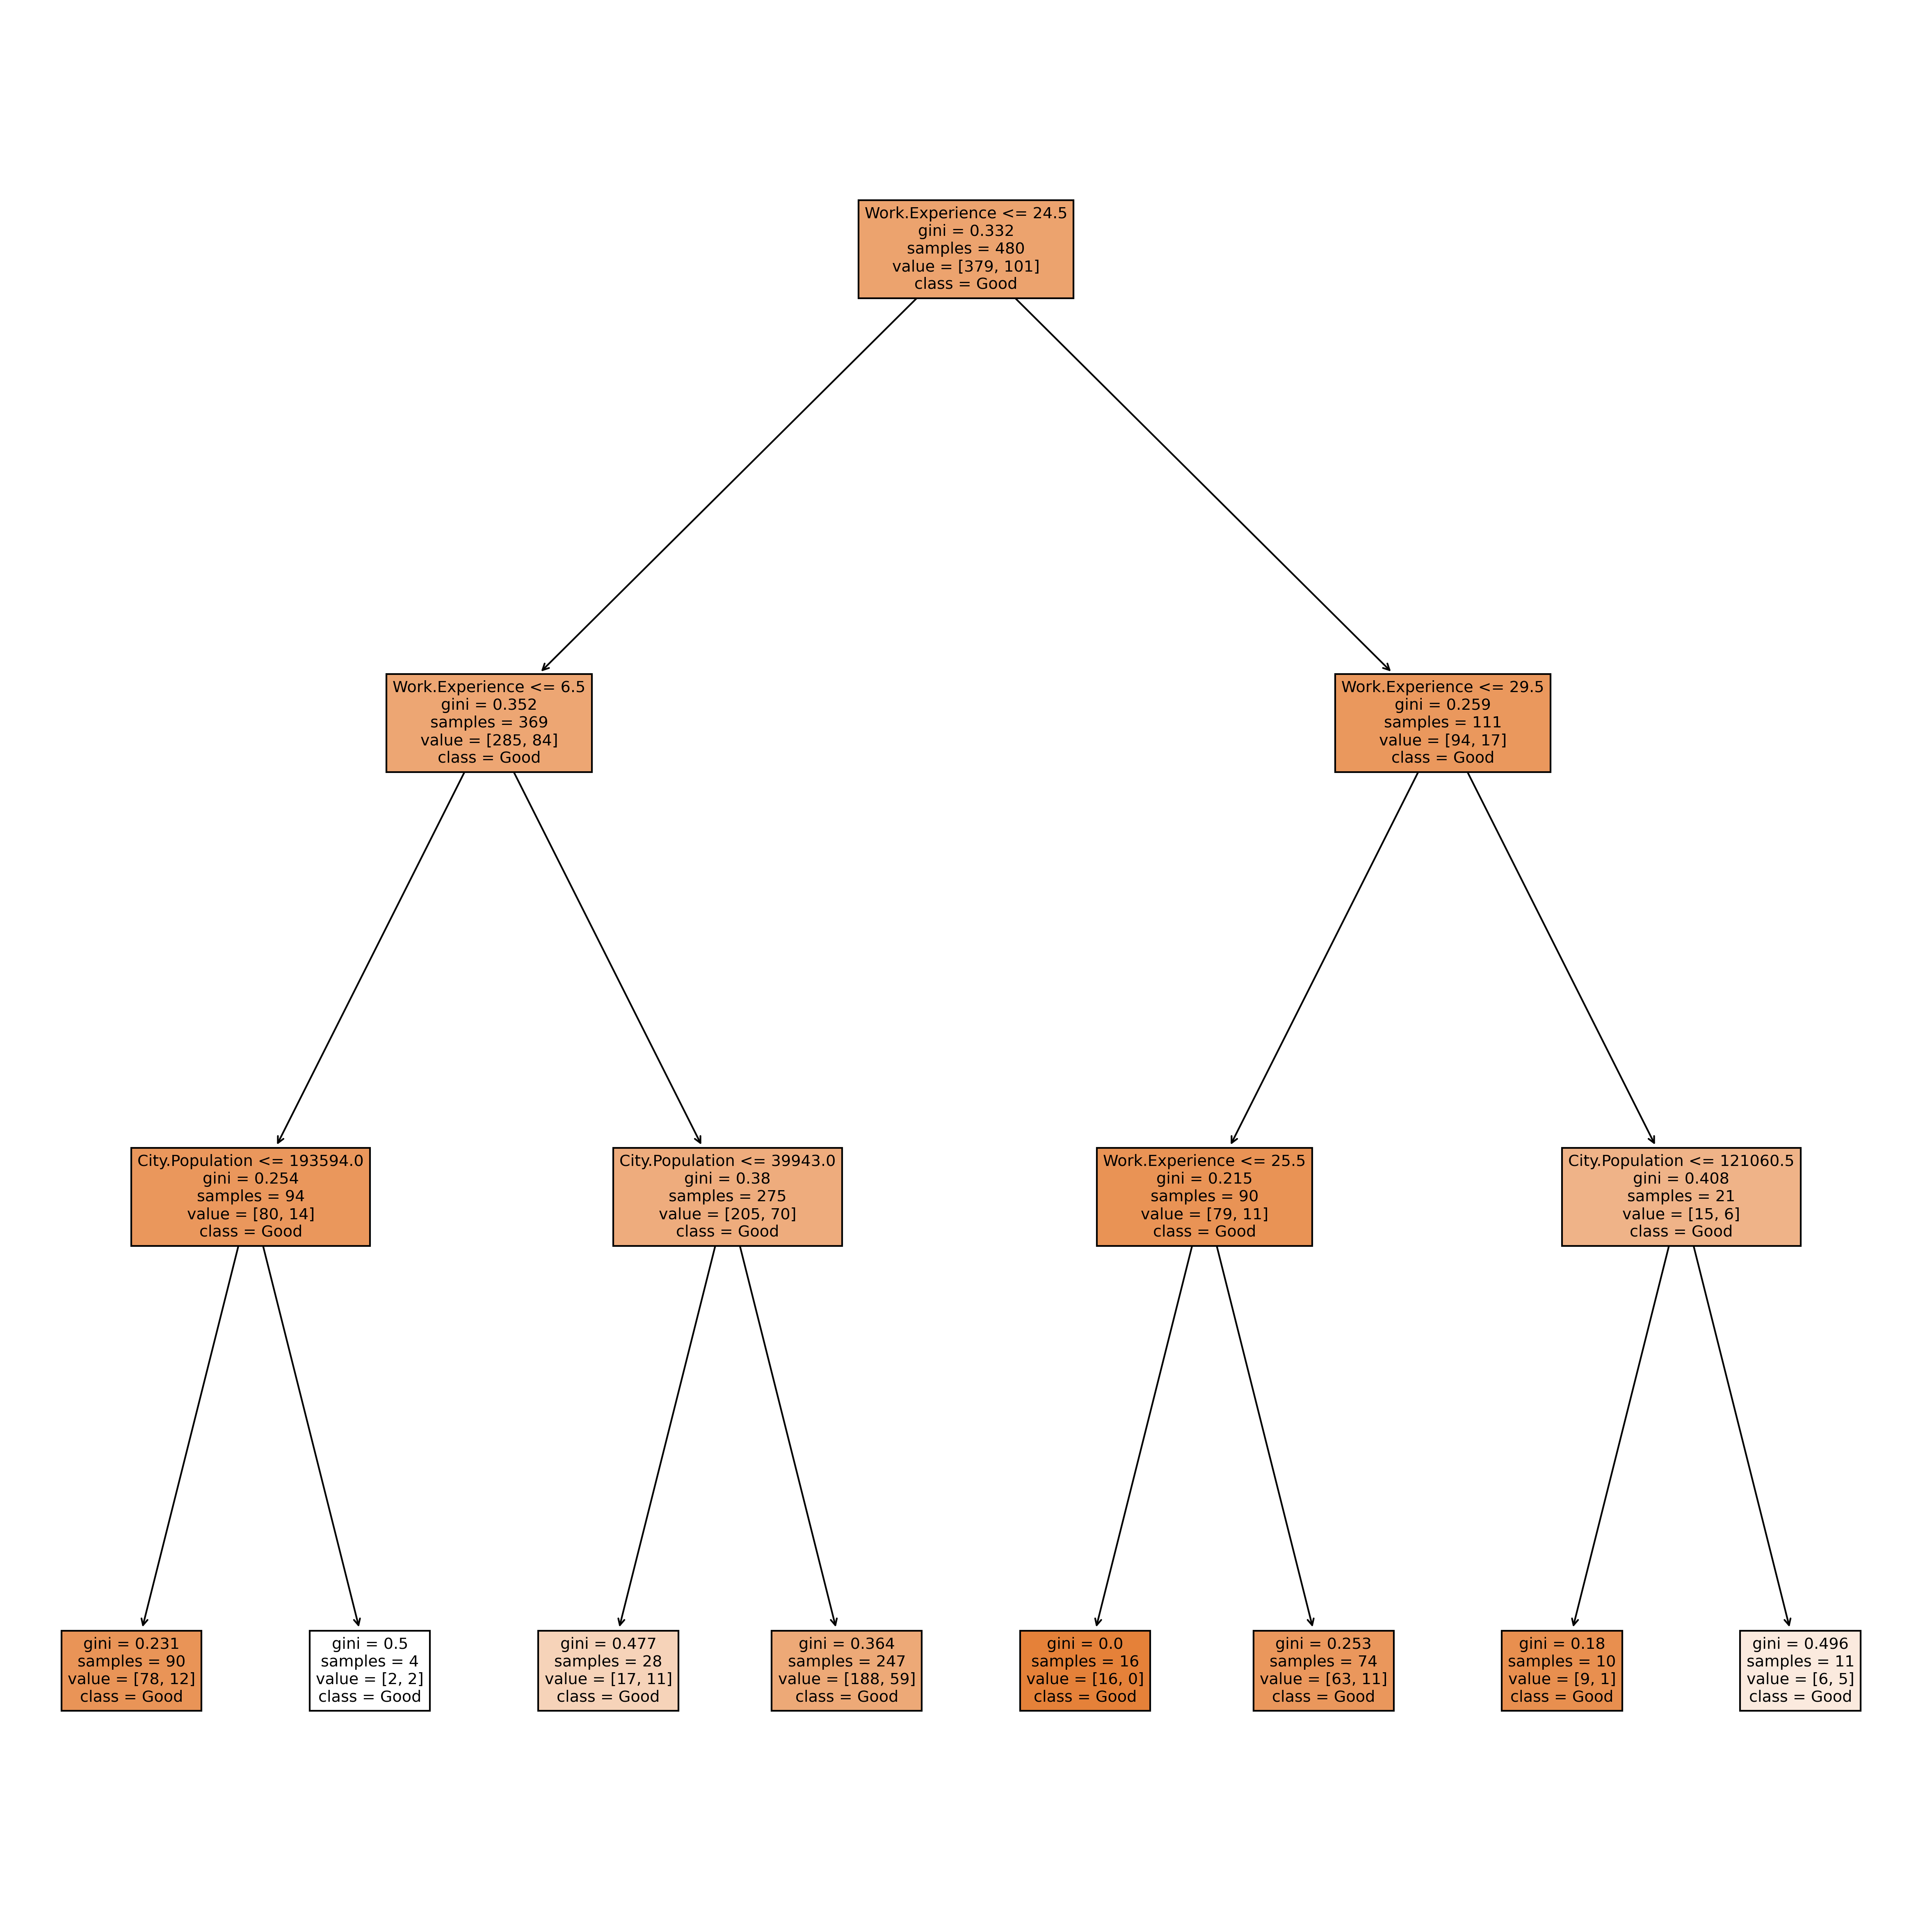

In [59]:
fn =['Undergrad','Marital.Status','City.Population','Work.Experience','Urban']
cn = ['Good','Risky']
fig,axes = plt.subplots(nrows=1, ncols=1, figsize=(20,20), dpi=300)
tree.plot_tree(model_gini,feature_names=fn, class_names=cn, filled=True)

In [60]:
# Predicting the model
pred_gini=model_gini.predict(X_test)
pd.Series(pred_gini).value_counts()

Good    120
dtype: int64

In [61]:
#Cross validation
pd.crosstab(Y_test,pred_gini)

col_0,Good
Taxable.Income,
Good,97
Risky,23


In [62]:
# Accuracy
np.mean(pred_gini==Y_test)*100

80.83333333333333

In [63]:
#Best features based on gini model
model_gini.feature_importances_

array([0.       , 0.       , 0.4693758, 0.5306242, 0.       ])

In [64]:
#Creating a series out of features score
fn =['Undergrad','Marital.Status','City.Population','Work.Experience','Urban']
F_gini = pd.Series(model_gini.feature_importances_,index=fn).sort_values(ascending=False)
F_gini

Work.Experience    0.530624
City.Population    0.469376
Undergrad          0.000000
Marital.Status     0.000000
Urban              0.000000
dtype: float64

In [65]:
#Creating a series out of features score
fn =['Undergrad','Marital.Status','City.Population','Work.Experience','Urban']
F_entropy = pd.Series(model.feature_importances_,index=fn).sort_values(ascending=False)
F_entropy

Work.Experience    0.608960
City.Population    0.259557
Urban              0.131483
Undergrad          0.000000
Marital.Status     0.000000
dtype: float64

In [66]:
columns = {'F_entropy':F_entropy,'F_gini':F_gini}
pd.concat(columns,axis=1,sort=False)

,F_entropy,F_gini
Work.Experience,0.608960,0.530624
City.Population,0.259557,0.469376
Urban,0.131483,0.000000
Undergrad,0.000000,0.000000
Marital.Status,0.000000,0.000000
